<a href="https://colab.research.google.com/github/dgalassi99/quant-trading-self-study/blob/main/01_foundations/W1_ohlcv_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import main libraries

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#get 5 years data with daily frequency for the specified tickers
tickers = ['AAPL','SPY','BTC']
data = yf.download(tickers,period='5y',interval='1d')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


In [3]:
data.isna().sum()

Price   Ticker
Close   AAPL         0
        BTC       1078
        SPY          0
High    AAPL         0
        BTC       1078
        SPY          0
Low     AAPL         0
        BTC       1078
        SPY          0
Open    AAPL         0
        BTC       1078
        SPY          0
Volume  AAPL         0
        BTC       1078
        SPY          0
dtype: int64

In [4]:
#since the analysis is a comparison between the 3 I will drop all the rows containng missimg values
data.dropna(inplace=True)
data.isna().sum()

Price   Ticker
Close   AAPL      0
        BTC       0
        SPY       0
High    AAPL      0
        BTC       0
        SPY       0
Low     AAPL      0
        BTC       0
        SPY       0
Open    AAPL      0
        BTC       0
        SPY       0
Volume  AAPL      0
        BTC       0
        SPY       0
dtype: int64

In [5]:
#calculating daily returns and total return (over the entire period)
total_returns = {}
for ticker in tickers:
    data[f'{ticker}_return'] = data['Close'][ticker].pct_change() #daily return by iterating over the tickers anc calculating the daily pct_change
    first_close = data['Close'][ticker].iloc[0] #fisrt closing for each ticker
    last_close = data['Close'][ticker].iloc[-1] #last closing for each ticker
    total_return = (last_close - first_close)/first_close #total return for each ticker
    total_returns[ticker] = total_return #storing the total return for each ticker in a dictionary

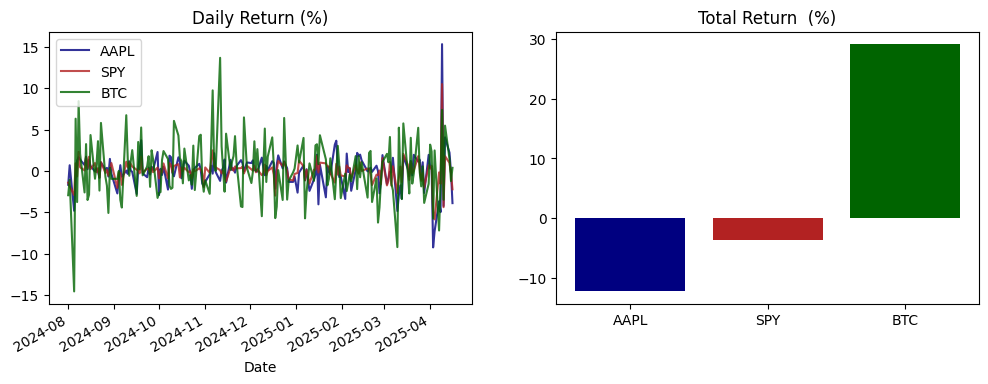

In [6]:
#plotting the daily return over the full period and as well the total retur
colors = ['navy','firebrick','darkgreen']
fig, axes = plt.subplots(1,2,figsize=(12,4))
for i,ticker in enumerate(tickers): #itereate along ticekr and index to change color
    (data[f'{ticker}_return']*100).plot(ax=axes[0], label = ticker, alpha = 0.8,color = colors[i]) #lineplot
    axes[1].bar(ticker,total_returns[ticker]*100,color=colors[i]) #bar plot

    axes[0].set_title('Daily Return (%)')
    axes[1].set_title('Total Return  (%)')


axes[0].legend(loc='upper left')

In [7]:
#let's now calculate the volatility
#to make things easy a create a dataframe for the daily returns
daily_returns = pd.DataFrame()
for ticker in tickers:
    daily_returns[ticker] = data['Close'][ticker].pct_change()

In [8]:
#main statistics for the daily returns
daily_returns.describe()

,AAPL,SPY,BTC
count,178.000000,178.000000,178.000000
mean,-0.000502,-0.000113,0.002058
std,0.021651,0.014016,0.035350
min,-0.092456,-0.058543,-0.145683
25%,-0.007311,-0.004402,-0.020094
50%,0.001187,0.000643,0.000000
75%,0.010270,0.005726,0.024128
max,0.153289,0.105019,0.136765


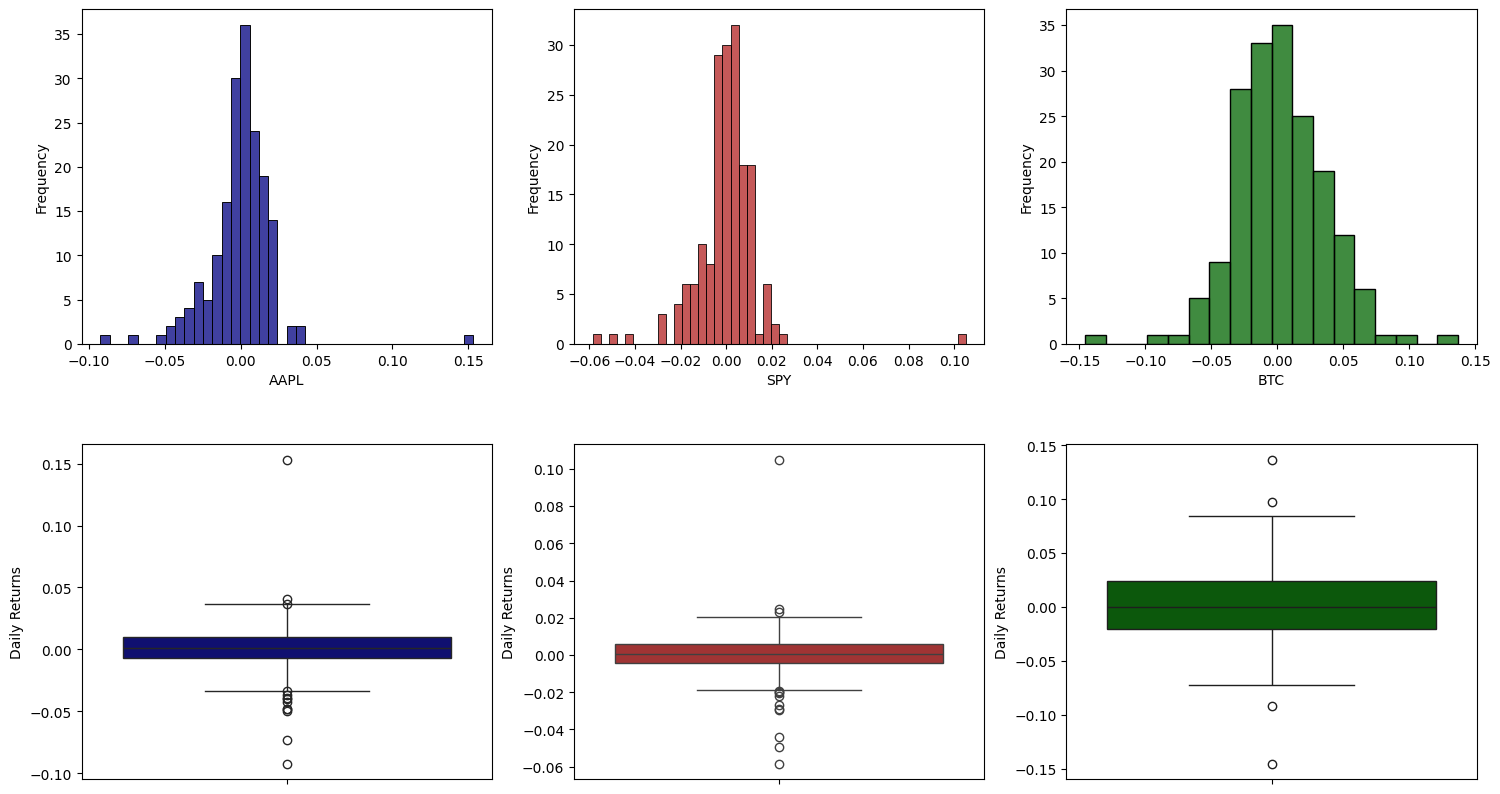

In [9]:
#distributions and boxplots for the daily returns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
#histograms (Distribution) in the first row
for i, ticker in enumerate(tickers):
    sns.histplot(daily_returns[ticker], kde=False, ax=axes[0, i], color=colors[i])
    axes[0, i].set_ylabel('Frequency')
#boxplots in the second row
for i, ticker in enumerate(tickers):
    sns.boxplot(y=daily_returns[ticker], ax=axes[1, i], color=colors[i])
    axes[1, i].set_ylabel('Daily Returns')
#adjusting the space between distributions and boxplots
plt.subplots_adjust(hspace=0.3)

We can observe from the distribution of the daily returns that BTC is more volatily than AAPL and SPY.
Other than for an outlier +-10% daily return for AAPL and SPY (due to Trump releasing and blocking tariffs) we usually expect a more center distribution and less skewed than BTC

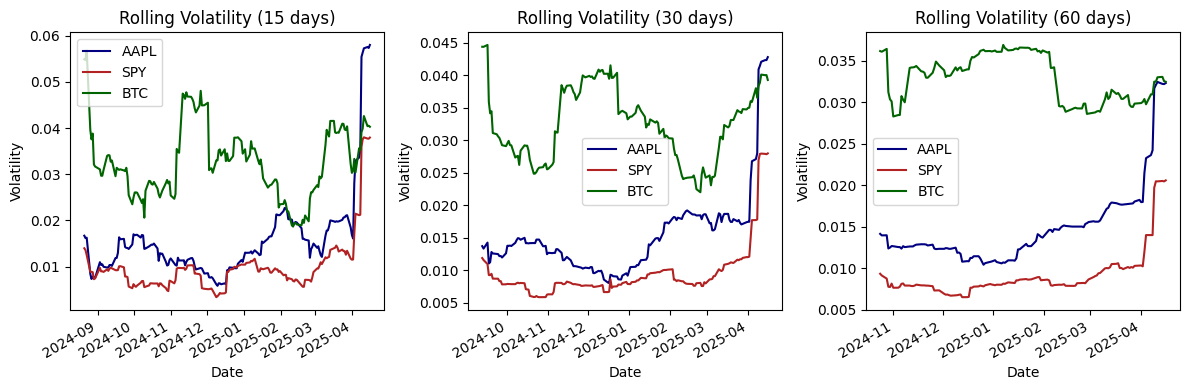

In [17]:
windows = [15,30,60]
rolling_volatility_half = daily_returns.rolling(window=windows[0]).std()
rolling_volatility = daily_returns.rolling(window=windows[1]).std()
rolling_volatility_twice = daily_returns.rolling(window=windows[2]).std()
volatility_data = [rolling_volatility_half, rolling_volatility, rolling_volatility_twice]

fig, axes = plt.subplots(1,len(windows), figsize=(12, 4)) # Create subplots based on window sizes

for i, (vol_data, window) in enumerate(zip(volatility_data, windows)):
    ax = axes[i]  # Get the subplot for the current window
    for j, ticker in enumerate(tickers):
        vol_data[ticker].plot(ax=ax, label=ticker, color=colors[j]) # Plot for each ticker
    ax.set_title(f'Rolling Volatility ({window} days)')
    ax.set_xlabel('Date')
    ax.set_ylabel('Volatility')
    ax.legend()  # Add a legend

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()  # Show the plot

The observation we made before on volatility is confirmed by observing how the 15, 30 and 60 days rolling volatility for BTC is always higher thant for AAPL and SPY (exception last period again bc of Trump policies)

In [11]:
#let's now calcualte rolling averages (let's just do it for BTC) and for a shorter timeframe (1hour)
btc_data = yf.download('BTC-USD', period='1y', interval='1h')

[*********************100%***********************]  1 of 1 completed


In [34]:
#only closing prices
btc = btc_data[['Close']]
btc.isna().sum()
#let's calcualte the 20 and 50 MA
btc['200ma'] = btc['Close'].rolling(window=200).mean()
btc['50ma'] = btc['Close'].rolling(window=50).mean()
btc['h_returs'] = btc['Close'].pct_change()
btc['200rvol'] = btc['h_returs'].rolling(window=200).std()
btc['50rvol'] = btc['h_returs'].rolling(window=50).std()

<ipython-input-34-43c01d828efe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['200ma'] = btc['Close'].rolling(window=200).mean()
<ipython-input-34-43c01d828efe>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc['50ma'] = btc['Close'].rolling(window=50).mean()
<ipython-input-34-43c01d828efe>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [28]:
btc.dropna(inplace=True)

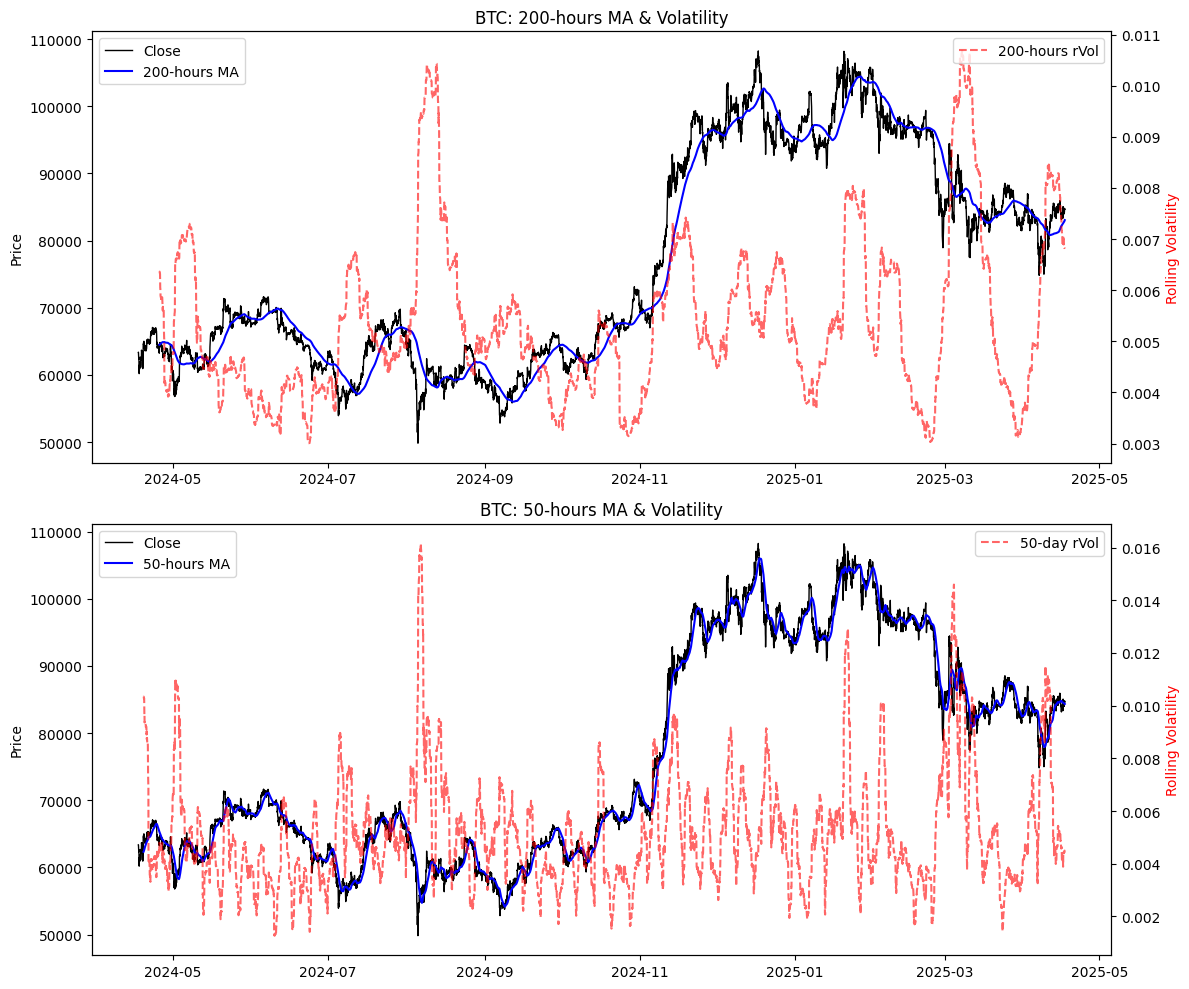

In [37]:
fig,(ax1,ax2)=plt.subplots(2,1,figsize=(12,10))

ax1.plot(btc.index, btc['Close'], label='Close', color='black', linewidth=1)
ax1.plot(btc.index, btc['200ma'], label='200-hours MA', color='blue')
ax1.set_ylabel('Price', color='black')
ax1.set_title('BTC: 200-hours MA & Volatility')
ax1.legend(loc='upper left')

ax1_twin = ax1.twinx()
ax1_twin.plot(btc.index, btc['200rvol'], label='200-hours rVol', color='red', linestyle='--', alpha=0.6)
ax1_twin.set_ylabel('Rolling Volatility', color='red')
ax1_twin.legend(loc='upper right')

ax2.plot(btc.index, btc['Close'], label='Close', color='black', linewidth=1)
ax2.plot(btc.index, btc['50ma'], label='50-hours MA', color='blue')
ax2.set_ylabel('Price', color='black')
ax2.set_title('BTC: 50-hours MA & Volatility')
ax2.legend(loc='upper left')

ax2_twin = ax2.twinx()
ax2_twin.plot(btc.index, btc['50rvol'], label='50-day rVol', color='red', linestyle='--', alpha=0.6)
ax2_twin.set_ylabel('Rolling Volatility', color='red')
ax2_twin.legend(loc='upper right')

plt.tight_layout()
plt.show()

Comments about the chart. I will mostly focus on the 200 period one as it is cleares.

What can we notice?
1. The 200 MA being on a "long-period" strongly acts as supoprt or resistance
2. When the 200 MA is broken upside could be a buy opportunity and when broken downside a sell signal
3. Point 3 "very very simple strategy" can be coupled with volatility. Mostly on the short side, when the MA acts a support and is broken downside the volatility rises fast. This can signal a panic selling situation

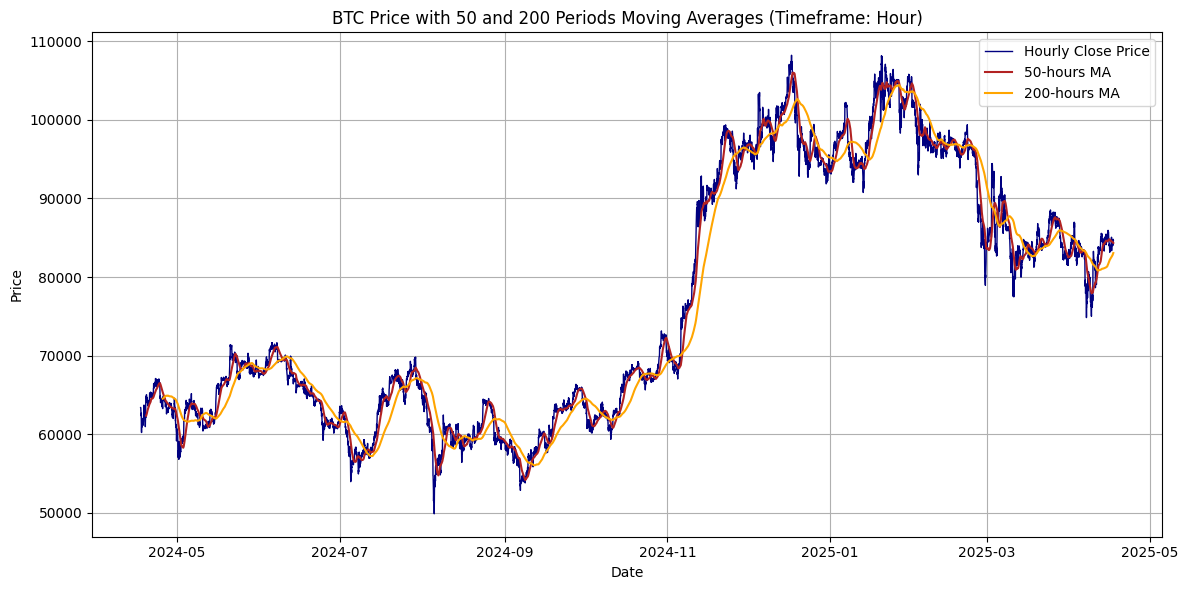

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(btc.index, btc['Close'], label='Hourly Close Price', color='navy', linewidth=1,linestyle='-')
plt.plot(btc.index, btc['50ma'], label='50-hours MA', color='firebrick', linewidth=1.5)
plt.plot(btc.index, btc['200ma'], label='200-hours MA', color='orange', linewidth=1.5)

plt.title('BTC Price with 50 and 200 Periods Moving Averages (Timeframe: Hour)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

I just wanted to observe the 2 MAs on the same chart here :)